In [2]:
import pandas as pd
import numpy as np

data = pd.read_excel(r"H:\My Drive\Intership Docs\UBER_PROJECT\Uber-Jan-Feb-FOIL.xlsx")
data

,dispatching_base_number,date,active_vehicles,trips
0,B02512,2015-01-01 00:00:00,190,1132
1,B02765,2015-01-01 00:00:00,225,1765
2,B02764,2015-01-01 00:00:00,3427,29421
3,B02682,2015-01-01 00:00:00,945,7679
4,B02617,2015-01-01 00:00:00,1228,9537
...,...,...,...,...
349,B02764,2/28/2015,3952,39812
350,B02617,2/28/2015,1372,14022
351,B02682,2/28/2015,1386,14472
352,B02512,2/28/2015,230,1803


In [3]:
data.describe()

,active_vehicles,trips
count,354.000000,354.000000
mean,1307.435028,11667.316384
std,1162.510626,10648.284865
min,112.000000,629.000000
25%,296.750000,2408.500000
50%,1077.000000,9601.000000
75%,1417.000000,13711.250000
max,4395.000000,45858.000000


In [6]:
data.dtypes

dispatching_base_number            object
date                       datetime64[ns]
active_vehicles                     int64
trips                               int64
dtype: object

In [5]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [7]:
data.isnull().sum()

dispatching_base_number    0
date                       0
active_vehicles            0
trips                      0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.nunique()

dispatching_base_number      6
date                        59
active_vehicles            314
trips                      348
dtype: int64

In [10]:
Q1 = data['active_vehicles'].quantile(0.25)
Q3 = data['active_vehicles'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 values:", Q1)
print("Q3 values:", Q3)
print("IQR values:", IQR)

Q1 values: 296.75
Q3 values: 1417.0
IQR values: 1120.25


In [11]:
lower_limit = Q1 - 1.5 * (IQR)
upper_limit = Q3 + 1.5 * (IQR)
print(lower_limit)
print(upper_limit)

-1383.625
3097.375


In [12]:
outliers = np.where((data['active_vehicles'] > upper_limit) | (data['active_vehicles'] < lower_limit))
outliers
outliers = ((data['active_vehicles'] > upper_limit) | (data['active_vehicles'] < lower_limit)).sum()
outliers

55

<Axes: ylabel='active_vehicles'>

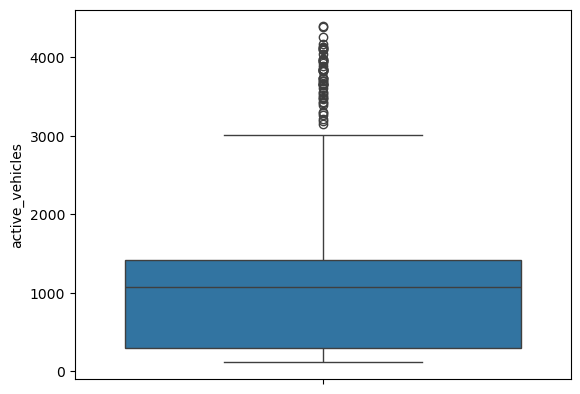

In [13]:
import seaborn as sns
sns.boxplot(data.active_vehicles)

In [14]:
!pip install feature_engine

<Axes: ylabel='active_vehicles'>

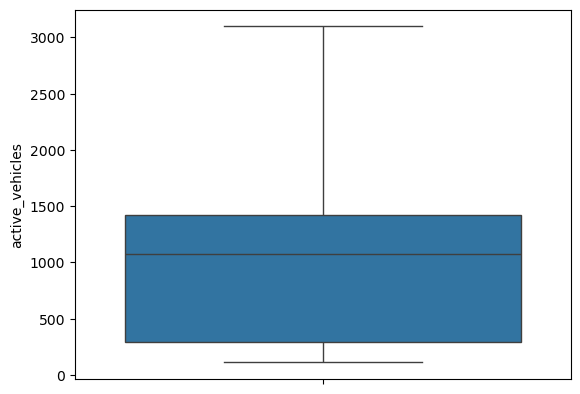

In [15]:
from feature_engine.outliers import Winsorizer
Winsorization = Winsorizer(capping_method = 'iqr',tail = 'both', fold = 1.5, variables = ['active_vehicles'])
x = Winsorization.fit_transform(data[['active_vehicles']])
sns.boxplot(x.active_vehicles)

In [16]:
Q1 = data['trips'].quantile(0.25)
Q3 = data['trips'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 values:", Q1)
print("Q3 values:", Q3)
print("IQR values:", IQR)

Q1 values: 2408.5
Q3 values: 13711.25
IQR values: 11302.75


In [17]:
lower_limit = Q1 - 1.5 * (IQR)
upper_limit = Q3 + 1.5 * (IQR)
print(lower_limit)
print(upper_limit)

-14545.625
30665.375


In [18]:
outliers = np.where((data['trips'] > upper_limit) | (data['trips'] < lower_limit))
outliers
outliers = ((data['trips'] > upper_limit) | (data['trips'] < lower_limit)).sum()
outliers

35

<Axes: ylabel='trips'>

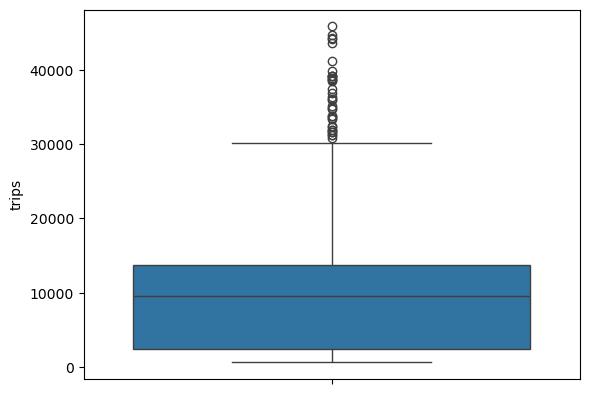

In [19]:
import seaborn as sns
sns.boxplot(data.trips)

In [20]:
!pip install feature_engine

<Axes: ylabel='trips'>

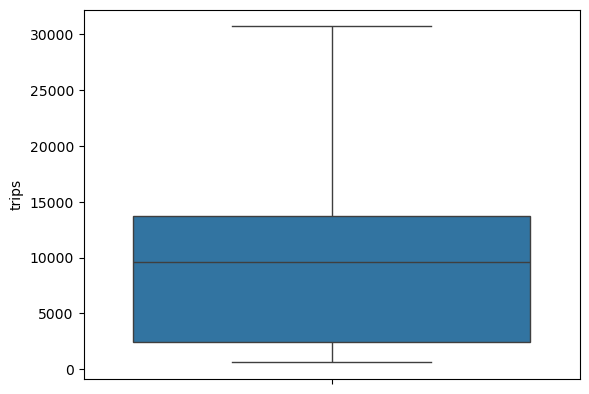

In [21]:
from feature_engine.outliers import Winsorizer
Winsorization = Winsorizer(capping_method = 'iqr',tail = 'both', fold = 1.5, variables = ['trips'])
x = Winsorization.fit_transform(data[['trips']])
sns.boxplot(x.trips)

<Axes: >

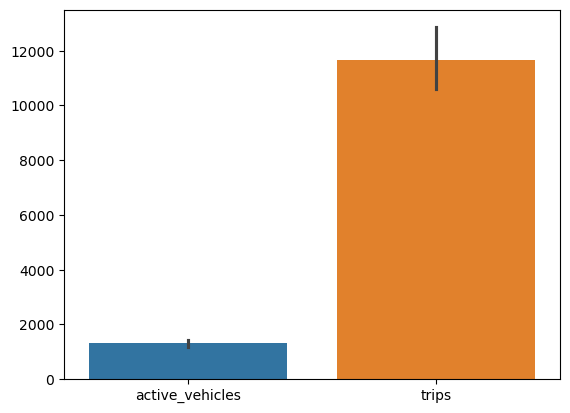

In [22]:
sns.barplot(data)

<Axes: >

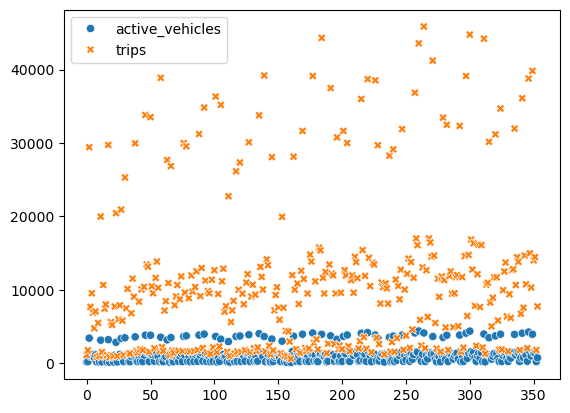

In [23]:
sns.scatterplot(data)

<Axes: >

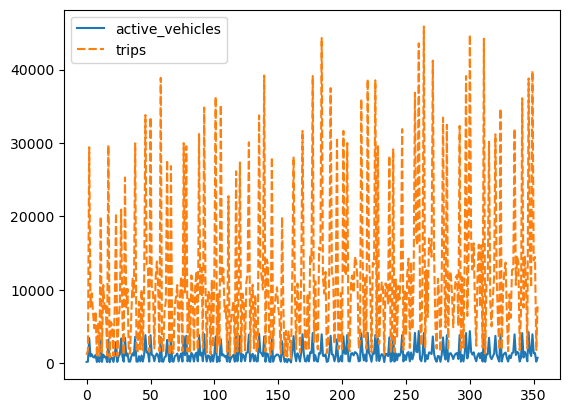

In [24]:
sns.lineplot(data)

In [26]:
data.to_csv(r'H:\My Drive\Intership Docs\UBER_PROJECT\Uber_cleaned_data.csv', index=False)

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()
df = AV.AutoViz(r"H:\My Drive\Intership Docs\UBER_PROJECT\Uber_cleaned_data.xl")
plt.show()